#  Import Library

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import google.generativeai as genai

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Misc.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fachr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fachr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fachr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Preprocessing

## Import Data

### DKI Jakarta

In [2]:
dki_paths = [
    #r'.\File Scraping\DKI Jakarta\Jakarta_reviews.csv',
    r'.\File Scraping\Full Jakarta\full_jakarta_reviews.csv',
    r'.\File Scraping\DKI Jakarta\Revisi Jakarta 1\Jakarta_reviews_rev1.csv',
    r'.\File Scraping\DKI Jakarta\Revisi Jakarta 2\Jakarta_reviews_rev2.csv',
    r'.\File Scraping\DKI Jakarta\Revisi Jakarta 3\Jakarta_reviews_rev3.csv'
]

In [3]:
dki_dfs = [pd.read_csv(dki_path) for dki_path in dki_paths]
dki_xlsx = pd.read_excel('.\File Scraping\DKI Jakarta\Jakarta_reviews.xlsx')

### Banten

In [4]:
banten_paths = [
    r'.\File Scraping\Banten\Banten_reviews.csv',
    r'.\File Scraping\Banten\Revisi Banten 1\Banten_reviews_rev1.csv',
    r'.\File Scraping\Banten\Revisi Banten 2\Banten_reviews_rev2.csv',
    r'.\File Scraping\Banten\Revisi Banten 3\Banten_reviews_rev3.csv',
    r'.\File Scraping\Banten\Revisi Banten 4\Banten_reviews_rev4.csv',
    r'.\File Scraping\Banten\Revisi Banten 5\Banten_reviews_rev5.csv'
]

In [5]:
banten_dfs = [pd.read_csv(banten_path) for banten_path in banten_paths]

### Jawa Barat

In [6]:
jabar_paths = [
    r'.\File Scraping\Jawa Barat\Jabar_reviews.csv',
    r'.\File Scraping\Jawa Barat\Revisi Jawa Barat 1\Jabar_reviews_rev1.csv',
    r'.\File Scraping\Jawa Barat\Revisi Jawa Barat 2\Jabar_reviews_rev2.csv',
    r'.\File Scraping\Jawa Barat\Revisi Jawa Barat 3\Jabar_reviews_rev3.csv',
    r'.\File Scraping\Jawa Barat\Revisi Jawa Barat 4\Jabar_reviews_rev4.csv'
]

In [7]:
jabar_dfs = [pd.read_csv(jabar_path) for jabar_path in jabar_paths]

### Jawa Tengah

In [8]:
jateng_paths = [
    #r'.\File Scraping\DKI Jakarta\Jakarta_reviews.csv',
    r'.\File Scraping\Jawa Tengah\Revisi Jawa Tengah 1\jateng_reviews_rev1.csv',
    r'.\File Scraping\Jawa Tengah\Revisi Jawa Tengah 2\jateng_reviews_rev2.csv',
    r'.\File Scraping\Jawa Tengah\Revisi Jawa Tengah 3\jateng_reviews_rev3.csv'
]

In [9]:
jateng_dfs = [pd.read_csv(jateng_path) for jateng_path in jateng_paths]
jateng_xlsx = pd.read_excel('.\File Scraping\Jawa Tengah\Jateng_reviews.xlsx')

### Jawa Timur

In [10]:
jatim_paths = [
    r'.\File Scraping\Jawa Timur\jatim_reviews.csv',
    r'.\File Scraping\Jawa Timur\Revisi Jawa Timur 1\jatim_reviews_rev1.csv',
    r'.\File Scraping\Jawa Timur\Revisi Jawa Timur 2\jatim_reviews_rev2.csv',
    r'.\File Scraping\Jawa Timur\Revisi Jawa Timur 3\jatim_reviews_rev3.csv'
]

In [11]:
jatim_dfs = [pd.read_csv(jatim_path) for jatim_path in jatim_paths]

### DI Yogyakarta

In [12]:
diy_paths = [
    r'.\File Scraping\DIY\DIY_reviews.csv',
    r'.\File Scraping\DIY\Revisi DIY 1\DIY_reviews_rev1.csv',
    r'.\File Scraping\DIY\Revisi DIY 2\DIY_reviews_rev2.csv',
    r'.\File Scraping\DIY\Revisi DIY 3\DIY_reviews_rev3.csv'
]

In [13]:
diy_dfs = [pd.read_csv(diy_path) for diy_path in diy_paths]

## Concat

In [14]:
merged_dki = pd.concat([pd.concat(dki_dfs, ignore_index=True), dki_xlsx], ignore_index=True)
merged_banten = pd.concat(banten_dfs, ignore_index=True)
merged_jabar = pd.concat(jabar_dfs, ignore_index=True)
merged_jateng = pd.concat([pd.concat(jateng_dfs, ignore_index=True), jateng_xlsx], ignore_index=True)
merged_jatim = pd.concat(jatim_dfs, ignore_index=True)
merged_diy = pd.concat(diy_dfs, ignore_index=True)

## Drop Feature

In [15]:
merged_dki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760317 entries, 0 to 760316
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           644578 non-null  float64
 1   place_id                             760317 non-null  object 
 2   place_name                           760317 non-null  object 
 3   review_id_hash                       760317 non-null  object 
 4   rating                               760317 non-null  int64  
 5   review_text                          391650 non-null  object 
 6   published_at                         760317 non-null  object 
 7   published_at_date                    760316 non-null  object 
 8   response_from_owner_text             77984 non-null   object 
 9   response_from_owner_ago              79329 non-null   object 
 10  response_from_owner_date             79326 non-null   object 
 11  review_likes_

In [16]:
selected_col = ['place_id', 'review_id_hash', 'rating', 'published_at_date',
                'review_text', 'review_translated_text'
                ]

In [17]:
clean_df_dki = merged_dki[selected_col]
clean_df_banten = merged_banten[selected_col]
clean_df_jabar = merged_jabar[selected_col]
clean_df_jateng = merged_jateng[selected_col]
clean_df_jatim = merged_jatim[selected_col]
clean_df_diy = merged_diy[selected_col]

## Combine All

In [18]:
full_df = pd.concat([clean_df_dki, clean_df_banten, clean_df_jabar, clean_df_jateng, clean_df_jatim, clean_df_diy], ignore_index=True)
full_df = full_df.drop_duplicates(subset='review_id_hash', ignore_index=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777924 entries, 0 to 777923
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   place_id                777924 non-null  object
 1   review_id_hash          777924 non-null  object
 2   rating                  777924 non-null  int64 
 3   published_at_date       777923 non-null  object
 4   review_text             403620 non-null  object
 5   review_translated_text  315981 non-null  object
dtypes: int64(1), object(5)
memory usage: 35.6+ MB


## Feature Engineering

### date filter 

In [19]:
# Ubah kolom published_at_date menjadi format datetime
full_df['published_at_date'] = pd.to_datetime(full_df['published_at_date']).dt.date

# Filter untuk 5 tahun terakhir
end_date = pd.to_datetime('now').date()
start_date = end_date.replace(year=end_date.year - 5)

full_df = full_df[(full_df['published_at_date'] >= start_date) & (full_df['published_at_date'] <= end_date)]

In [20]:
full_df

,place_id,review_id_hash,rating,published_at_date,review_text,review_translated_text
0,ChIJu9y7OwvzaS4RLbblSdhvIEw,a18eac00957bdcb65c125d719aa5cba6,5,2023-12-01,NaN,NaN
1,ChIJu9y7OwvzaS4RLbblSdhvIEw,335fb2a4cf49ec4d09eefe501069feb6,5,2023-12-01,Rayain party pack walau cuma beli minimal 3 aj...,"Celebrate the party pack, even if you only buy..."
2,ChIJu9y7OwvzaS4RLbblSdhvIEw,1e0c1274579f38c2384772224573810f,5,2023-12-01,NaN,NaN
3,ChIJu9y7OwvzaS4RLbblSdhvIEw,89eb5616efbc2ccafb304b8eac29c5f9,5,2023-12-01,NaN,NaN
4,ChIJu9y7OwvzaS4RLbblSdhvIEw,8b3130ef4a2da4242eff8db2ecd4f3af,5,2023-12-01,NaN,NaN
...,...,...,...,...,...,...
777919,ChIJrYIz0CJXei4R-NAdJzRuNeE,a332d84cb4c015471476b302fca0c0ac,5,2023-05-14,Rasanya enak,It feels good
777920,ChIJEeRcDTFZei4RGwM0XiFELDo,5b63313e61c9e5d97b8c26af6e777634,5,2023-12-14,NaN,NaN
777921,ChIJQ3jEZgBZei4RJq00TKSIV7w,8d28e90adb3a0e4714898944b105ac39,5,2024-04-14,NaN,NaN
777922,ChIJi2wQirFZei4RsHLHfUxpZ_k,0546bd30d3bf441d27d7d830ccfe1cee,5,2020-05-14,NaN,NaN


### Add indonesian_text and english_text

In [21]:
# Inisialisasi kolom baru dengan dtype yang sesuai
full_df['english_review'] = np.nan
full_df['indonesian_review'] = np.nan

# Memisahkan ulasan berdasarkan bahasa menggunakan operasi vectorized
mask_both_notnull = full_df['review_text'].notnull() & full_df['review_translated_text'].notnull()
mask_translated_null = full_df['review_translated_text'].isnull()

full_df.loc[mask_both_notnull, 'english_review'] = full_df['review_translated_text']
full_df.loc[mask_both_notnull, 'indonesian_review'] = full_df['review_text']
full_df.loc[mask_translated_null, 'english_review'] = full_df['review_text']

# Menghapus kolom asli
full_df.drop(['review_text', 'review_translated_text'], axis=1, inplace=True)

In [22]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727242 entries, 0 to 777923
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   place_id           727242 non-null  object
 1   review_id_hash     727242 non-null  object
 2   rating             727242 non-null  int64 
 3   published_at_date  727242 non-null  object
 4   english_review     378859 non-null  object
 5   indonesian_review  296115 non-null  object
dtypes: int64(1), object(5)
memory usage: 55.0+ MB


### Add Label

In [23]:
def determine_sentiment(rating):
    if rating < 4:
        return 0  # Negatif
    else:
        return 1  # Positif

# Menambahkan kolom sentiment berdasarkan rating
full_df['sentiment'] = full_df['rating'].apply(determine_sentiment)

In [24]:
full_df

,place_id,review_id_hash,rating,published_at_date,english_review,indonesian_review,sentiment
0,ChIJu9y7OwvzaS4RLbblSdhvIEw,a18eac00957bdcb65c125d719aa5cba6,5,2023-12-01,NaN,NaN,1
1,ChIJu9y7OwvzaS4RLbblSdhvIEw,335fb2a4cf49ec4d09eefe501069feb6,5,2023-12-01,"Celebrate the party pack, even if you only buy...",Rayain party pack walau cuma beli minimal 3 aj...,1
2,ChIJu9y7OwvzaS4RLbblSdhvIEw,1e0c1274579f38c2384772224573810f,5,2023-12-01,NaN,NaN,1
3,ChIJu9y7OwvzaS4RLbblSdhvIEw,89eb5616efbc2ccafb304b8eac29c5f9,5,2023-12-01,NaN,NaN,1
4,ChIJu9y7OwvzaS4RLbblSdhvIEw,8b3130ef4a2da4242eff8db2ecd4f3af,5,2023-12-01,NaN,NaN,1
...,...,...,...,...,...,...,...
777919,ChIJrYIz0CJXei4R-NAdJzRuNeE,a332d84cb4c015471476b302fca0c0ac,5,2023-05-14,It feels good,Rasanya enak,1
777920,ChIJEeRcDTFZei4RGwM0XiFELDo,5b63313e61c9e5d97b8c26af6e777634,5,2023-12-14,NaN,NaN,1
777921,ChIJQ3jEZgBZei4RJq00TKSIV7w,8d28e90adb3a0e4714898944b105ac39,5,2024-04-14,NaN,NaN,1
777922,ChIJi2wQirFZei4RsHLHfUxpZ_k,0546bd30d3bf441d27d7d830ccfe1cee,5,2020-05-14,NaN,NaN,1


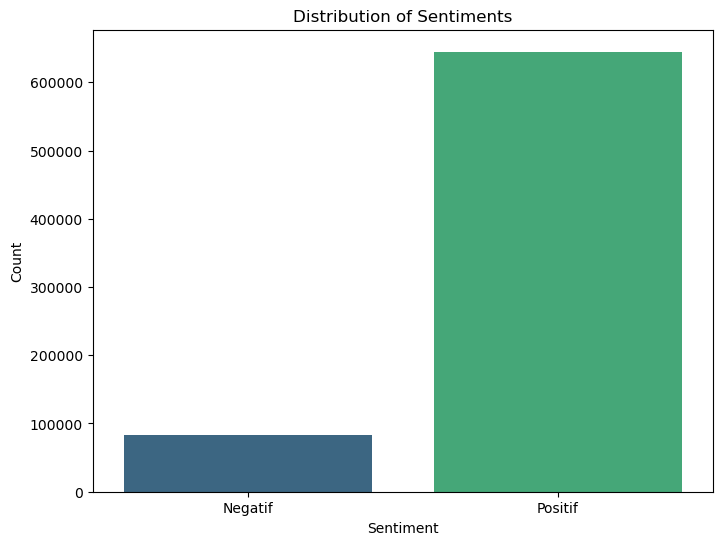

In [25]:
# Menghitung distribusi sentimen
sentiment_counts = full_df['sentiment'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.xticks(ticks=[0, 1], labels=['Negatif', 'Positif'])
plt.show()

In [26]:
indo_df    = full_df.drop('english_review', axis=1).dropna(subset=['indonesian_review'])
english_df = full_df.drop('indonesian_review', axis=1).dropna(subset=['english_review'])

In [27]:
english_df.to_csv('Sentiment Analysis\english_review.csv', index=False)

# Critism Dataset

## Import Data

In [28]:
critism_paths = [
    r'.\kritik dataset\df_neg_1.csv',
    r'.\kritik dataset\df_neg_2.csv',
    r'.\kritik dataset\df_neg_3.csv',
    r'.\kritik dataset\df_neg_4.csv',
    r'.\kritik dataset\df_neg_5.csv',
    r'.\kritik dataset\df_pos_1.csv',
    r'.\kritik dataset\df_pos_2.csv',
    r'.\kritik dataset\df_pos_3.csv',
    r'.\kritik dataset\df_pos_4.csv',
    r'.\kritik dataset\df_pos_5.csv',
    r'.\kritik dataset\df_pos_6.csv'
]

In [29]:
critism_dfs = [pd.read_csv(critism_path) for critism_path in critism_paths]

## Combine Data

In [30]:
merged_critism = pd.concat(critism_dfs, ignore_index=True)

## Feature Engineering

In [31]:
critism_df = merged_critism.dropna(subset=['label'])
critism_df['label'] = critism_df['label'].astype(int)

## Export

In [32]:
critism_df.to_csv("Sentiment Analysis\criticism_dataset.csv", index=False)